**Set environment**

In [1]:
suppressMessages(source("../config_sing.R"))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

In [3]:
start  = 48780000
end    = 48826000

dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(start < Loc, Loc < end)
dat = dat %>% dplyr::filter(Replicate %in% c("rep1", "rep2", "rep3", "rep4"))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Depth_Norm, Sample) %>% 
    spread(Sample, Depth_Norm) %>%
    mutate(
        Rep1 = log2((Output_rep1 + 10) / (Input_rep1 + 10)),
        Rep2 = log2((Output_rep2 + 10) / (Input_rep2 + 10)),
        Rep3 = log2((Output_rep3 + 10) / (Input_rep3 + 10)),
        Rep4 = log2((Output_rep4 + 10) / (Input_rep4 + 10)))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Rep1, Rep2, Rep3, Rep4) %>%
    gather(Sample, Value, -Chrom, -Loc)
head(dat)

Chrom,Loc,Sample,Value
<chr>,<dbl>,<chr>,<dbl>
chrX,48780001,Rep1,-1.420414e-05
chrX,48780002,Rep1,-1.420414e-05
chrX,48780003,Rep1,-1.380209e-05
chrX,48780004,Rep1,-1.380209e-05
chrX,48780005,Rep1,-1.380209e-05
chrX,48780006,Rep1,-1.380209e-05


In [4]:
gpt = ggplot(dat, aes(x = Loc, y = Value)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   facet_grid(Sample~.) +
   labs(x = "Location", 
        y = "log2(FC)", 
        title = "ATAC-STARR (bin: 1bp) chrX:48780000-48826000; FC = (Output+10)/(Input+10)")

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

ERROR: Error in value[[3L]](cond): could not open file '/tmp/RtmpDmFJRs/file13a111fc15f2c.png'


plot without title

In [ ]:
gpt = ggplot(dat, aes(x = Loc, y = Value)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   facet_grid(Sample~.) +
   xlim(48800000, 48803000) +
   labs(x = "Location", 
        y = "log2(FC)", 
        title = "ATAC-STARR (bin: 1bp) chrX:48800000-48803000; FC = (Output+10)/(Input+10)")


options(repr.plot.height=6, repr.plot.width=20)
print(gpt)

## Import data

In [35]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat_lib_dedup = dat %>% dplyr::filter(Dedup | Group=="Output")
dat_lib       = dat %>% dplyr::filter(!Dedup)

head(dat)

Sample,Group,Replicate,Region,Dedup,Size
<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Input_rep1,Input,rep1,GATA1,FALSE,577020
Input_rep1,Input,rep1,GATA1,TRUE,358823
Input_rep1,Input,rep1,MYC,FALSE,363635
Input_rep1,Input,rep1,MYC,TRUE,255600
Input_rep2,Input,rep2,GATA1,FALSE,835445
Input_rep2,Input,rep2,GATA1,TRUE,461577


**Test**

In [21]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### INPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP  = "Input"
REPLS  = paste0("rep", 1:6)
DEDUP  = TRUE

### INPUT: import data
repl = REPLS[1]
sam   = paste(GROUP, repl, sep="_")
print(sam)
cat("++++++++++++++++++++++++++++++\n")

fglob  = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
fpaths = Sys.glob(file.path(fdiry, fglob))
print(fpaths)
cat("++++++++++++++++++++++++++++++\n")

idx    = str_detect(fpaths, "dedups")
print(idx)
cat("++++++++++++++++++++++++++++++\n")
if (DEDUP) {
    fpath = fpaths[idx]
} else {
    fpath = fpaths[!idx]
}
print(fpath)
cat("++++++++++++++++++++++++++++++\n")
print(fpaths[idx])
cat("++++++++++++++++++++++++++++++\n")
print(fpaths[!idx])

[1] "Input_rep1"
++++++++++++++++++++++++++++++
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
[2] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.perbase.tsv.gz"       
++++++++++++++++++++++++++++++
[1]  TRUE FALSE
++++++++++++++++++++++++++++++
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
++++++++++++++++++++++++++++++
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
++++++++++++++++++++++++++++++
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.perbase.tsv.gz"


In [50]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### INPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP  = "Input"
REPLS  = paste0("rep", 1:6)
DEDUP  = "dedups"

### INPUT: import data
repl = REPLS[1]
sam   = paste(GROUP, repl, sep="_")
print(sam)
cat("++++++++++++++++++++++++++++++\n")

fglob = paste0("*", sam, "*", REGION, "*", DEDUP, "*", "perbase.tsv.gz")
fpath = Sys.glob(file.path(fdiry, fglob))
print(fpath)

[1] "Input_rep1"
++++++++++++++++++++++++++++++
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"


**Import**

In [29]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### INPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP  = "Input"
REPLS  = paste0("rep", 1:6)
DEDUP  = TRUE

### INPUT: import data
cat("Input (Deduplicated)", "\n")
lst_dat_inp_dedup = lapply(REPLS, function(repl){
    ### get sample file path
    sam    = paste(GROUP, repl, sep="_")
    fglob  = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpaths = Sys.glob(file.path(fdiry, fglob))
    
    ###
    idx = str_detect(fpaths, "dedups")
    if (DEDUP) {
        fpath = fpaths[idx]
    } else {
        fpath = fpaths[!idx]
    }
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

### INPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP  = "Input"
REPLS  = paste0("rep", 1:6)
DEDUP  = FALSE

### INPUT: import data
cat("\n", "Input (No Deduplicated)", "\n")
lst_dat_inp = lapply(REPLS, function(repl){
    ### get sample file path
    sam    = paste(GROUP, repl, sep="_")
    fglob  = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpaths = Sys.glob(file.path(fdiry, fglob))
    
    ###
    idx = str_detect(fpaths, "dedups")
    if (DEDUP) {
        fpath = fpaths[idx]
    } else {
        fpath = fpaths[!idx]
    }
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

### OUTPUT: set sample group and number of replicates
REGION = "GATA1"
GROUP   = "Output"
REPLS = paste0("rep", 1:4)

### OUTPUT: import data
cat("\n", "Output", "\n")
lst_dat_out = lapply(REPLS, function(repl){
    ### get sample file path
    sam   = paste(GROUP, repl, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    print(fpath)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    dat$Region = REGION
    return(dat)
})

Input (Deduplicated) 
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.perbase.tsv.gz"
[1] "/mount/work/out/proj_combeffect_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.perbase.tsv.gz"

 Input (No Deduplicated) 
[1] "/mount/work/out/proj_combeff

In [30]:
bind_rows(lst_dat_inp_dedup, lst_dat_out) %>% head

Chrom,Loc,Depth,Sample,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47786400,0,Input_rep1,GATA1
chrX,47786401,0,Input_rep1,GATA1
chrX,47786402,0,Input_rep1,GATA1
chrX,47786403,0,Input_rep1,GATA1
chrX,47786404,0,Input_rep1,GATA1
chrX,47786405,0,Input_rep1,GATA1


In [34]:
dat_lib %>% dplyr::filter(Dedup | Group=="Output")

Sample,Group,Replicate,Region,Dedup,Size
<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Input_rep1,Input,rep1,GATA1,TRUE,358823
Input_rep1,Input,rep1,MYC,TRUE,255600
Input_rep2,Input,rep2,GATA1,TRUE,461577
Input_rep2,Input,rep2,MYC,TRUE,331419
Input_rep3,Input,rep3,GATA1,TRUE,496229
Input_rep3,Input,rep3,MYC,TRUE,359228
Input_rep4,Input,rep4,GATA1,TRUE,464845
Input_rep4,Input,rep4,MYC,TRUE,335999
Input_rep5,Input,rep5,GATA1,TRUE,454013


In [33]:
dat_lib %>% dplyr::filter(!Dedup)

Sample,Group,Replicate,Region,Dedup,Size
<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Input_rep1,Input,rep1,GATA1,FALSE,577020
Input_rep1,Input,rep1,MYC,FALSE,363635
Input_rep2,Input,rep2,GATA1,FALSE,835445
Input_rep2,Input,rep2,MYC,FALSE,518727
Input_rep3,Input,rep3,GATA1,FALSE,930839
Input_rep3,Input,rep3,MYC,FALSE,584462
Input_rep4,Input,rep4,GATA1,FALSE,839575
Input_rep4,Input,rep4,MYC,FALSE,527997
Input_rep5,Input,rep5,GATA1,FALSE,806629


In [37]:
### summarize
dat_astarr_dedup = bind_rows(lst_dat_inp_dedup, lst_dat_out) %>% 
    left_join(dat_lib_dedup, by=c("Sample", "Region")) %>%
    mutate(Depth_Norm = Depth / Size)

print(head(dat_astarr_dedup))

# A tibble: 6 × 10
  Chrom      Loc Depth Sample     Region Group Replicate Dedup   Size Depth_Norm
  <chr>    <dbl> <dbl> <chr>      <chr>  <chr> <chr>     <lgl>  <dbl>      <dbl>
1 chrX  47786400     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
2 chrX  47786401     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
3 chrX  47786402     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
4 chrX  47786403     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
5 chrX  47786404     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0
6 chrX  47786405     0 Input_rep1 GATA1  Input rep1      TRUE  358823          0


In [39]:
### summarize
dat_astarr = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by=c("Sample", "Region")) %>%
    mutate(Depth_Norm = Depth / Size)

print(head(dat_astarr))

# A tibble: 6 × 10
  Chrom      Loc Depth Sample     Region Group Replicate Dedup   Size Depth_Norm
  <chr>    <dbl> <dbl> <chr>      <chr>  <chr> <chr>     <lgl>  <dbl>      <dbl>
1 chrX  47786400     0 Input_rep1 GATA1  Input rep1      FALSE 577020          0
2 chrX  47786401     0 Input_rep1 GATA1  Input rep1      FALSE 577020          0
3 chrX  47786402     0 Input_rep1 GATA1  Input rep1      FALSE 577020          0
4 chrX  47786403     0 Input_rep1 GATA1  Input rep1      FALSE 577020          0
5 chrX  47786404     0 Input_rep1 GATA1  Input rep1      FALSE 577020          0
6 chrX  47786405     0 Input_rep1 GATA1  Input rep1      FALSE 577020          0


## Replicate Alex results

In [44]:
start  = 48780000
end    = 48826000

dat = dat_astarr_dedup
dat = dat %>% dplyr::filter(start < Loc, Loc < end)
dat = dat %>% dplyr::filter(Replicate %in% c("rep1", "rep2", "rep3", "rep4"))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Depth_Norm, Sample) %>% 
    spread(Sample, Depth_Norm) %>%
    mutate(
        Rep1 = log2((Output_rep1 + 10) / (Input_rep1 + 10)),
        Rep2 = log2((Output_rep2 + 10) / (Input_rep2 + 10)),
        Rep3 = log2((Output_rep3 + 10) / (Input_rep3 + 10)),
        Rep4 = log2((Output_rep4 + 10) / (Input_rep4 + 10)))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Rep1, Rep2, Rep3, Rep4) %>%
    gather(Sample, Value, -Chrom, -Loc)
head(dat)

Chrom,Loc,Sample,Value
<chr>,<dbl>,<chr>,<dbl>
chrX,48780001,Rep1,-1.420414e-05
chrX,48780002,Rep1,-1.420414e-05
chrX,48780003,Rep1,-1.380209e-05
chrX,48780004,Rep1,-1.380209e-05
chrX,48780005,Rep1,-1.380209e-05
chrX,48780006,Rep1,-1.380209e-05


chrX:48780000-48826000

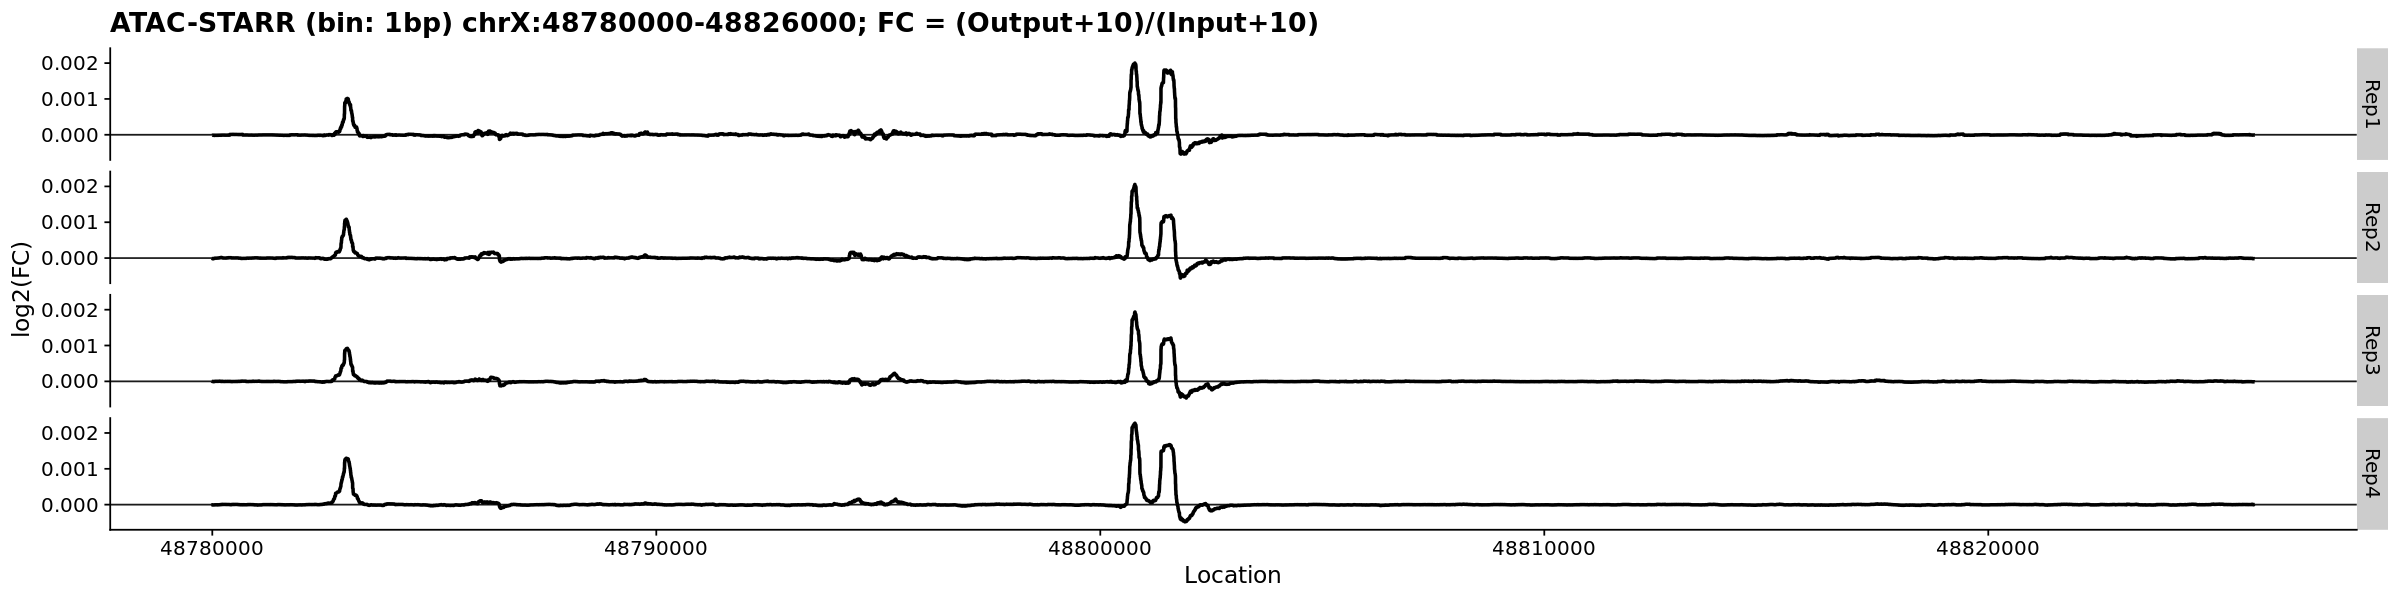

In [45]:
gpt = ggplot(tmp, aes(x = Loc, y = Value)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   facet_grid(Sample~.) +
   labs(x = "Location", 
        y = "log2(FC)", 
        title = "ATAC-STARR (bin: 1bp) chrX:48780000-48826000; FC = (Output+10)/(Input+10)")

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

chrX:48800000-48805000

Warning message:
“Removed 42998 row(s) containing missing values (geom_path).”


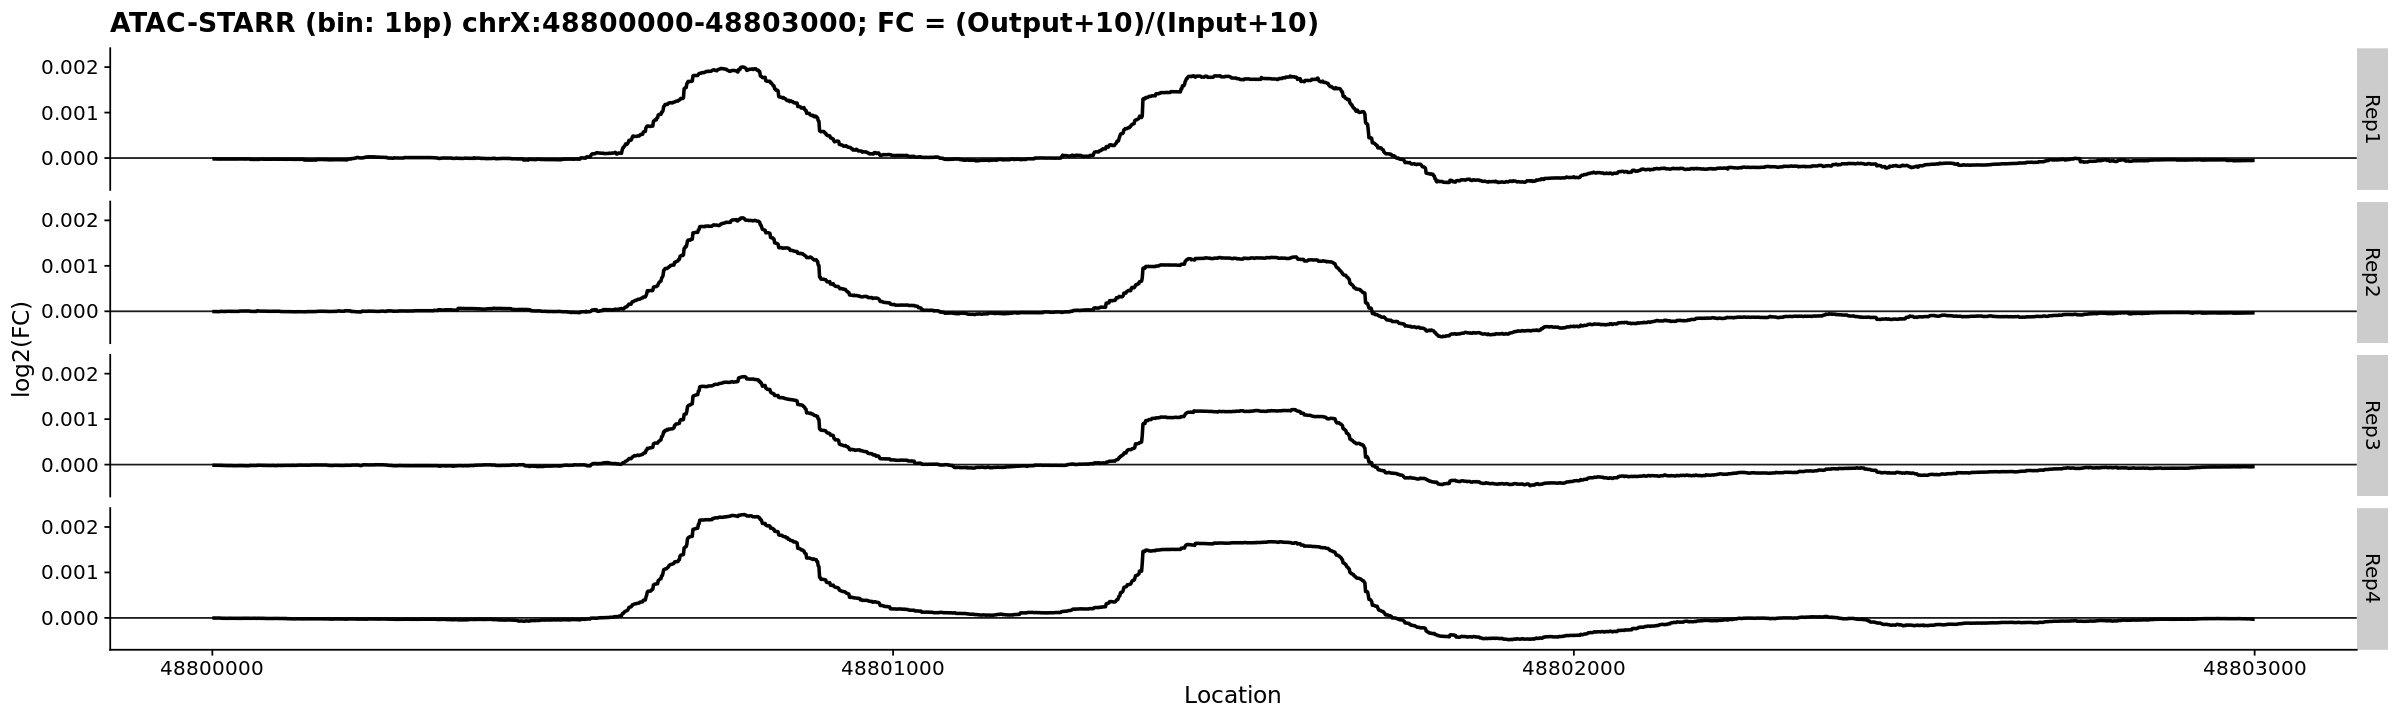

In [46]:
gpt = ggplot(tmp, aes(x = Loc, y = Value)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   facet_grid(Sample~.) +
   xlim(48800000, 48803000) +
   labs(x = "Location", 
        y = "log2(FC)", 
        title = "ATAC-STARR (bin: 1bp) chrX:48800000-48803000; FC = (Output+10)/(Input+10)")


options(repr.plot.height=6, repr.plot.width=20)
print(gpt)

In [47]:
start  = 48780000
end    = 48826000

dat = dat_astarr
dat = dat %>% dplyr::filter(start < Loc, Loc < end)
dat = dat %>% dplyr::filter(Replicate %in% c("rep1", "rep2", "rep3", "rep4"))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Depth_Norm, Sample) %>% 
    spread(Sample, Depth_Norm) %>%
    mutate(
        Rep1 = log2((Output_rep1 + 10) / (Input_rep1 + 10)),
        Rep2 = log2((Output_rep2 + 10) / (Input_rep2 + 10)),
        Rep3 = log2((Output_rep3 + 10) / (Input_rep3 + 10)),
        Rep4 = log2((Output_rep4 + 10) / (Input_rep4 + 10)))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Rep1, Rep2, Rep3, Rep4) %>%
    gather(Sample, Value, -Chrom, -Loc)
head(dat)

Chrom,Loc,Sample,Value
<chr>,<dbl>,<chr>,<dbl>
chrX,48780001,Rep1,-8.376217e-06
chrX,48780002,Rep1,-8.376217e-06
chrX,48780003,Rep1,-8.126195e-06
chrX,48780004,Rep1,-8.126195e-06
chrX,48780005,Rep1,-8.126195e-06
chrX,48780006,Rep1,-8.126195e-06


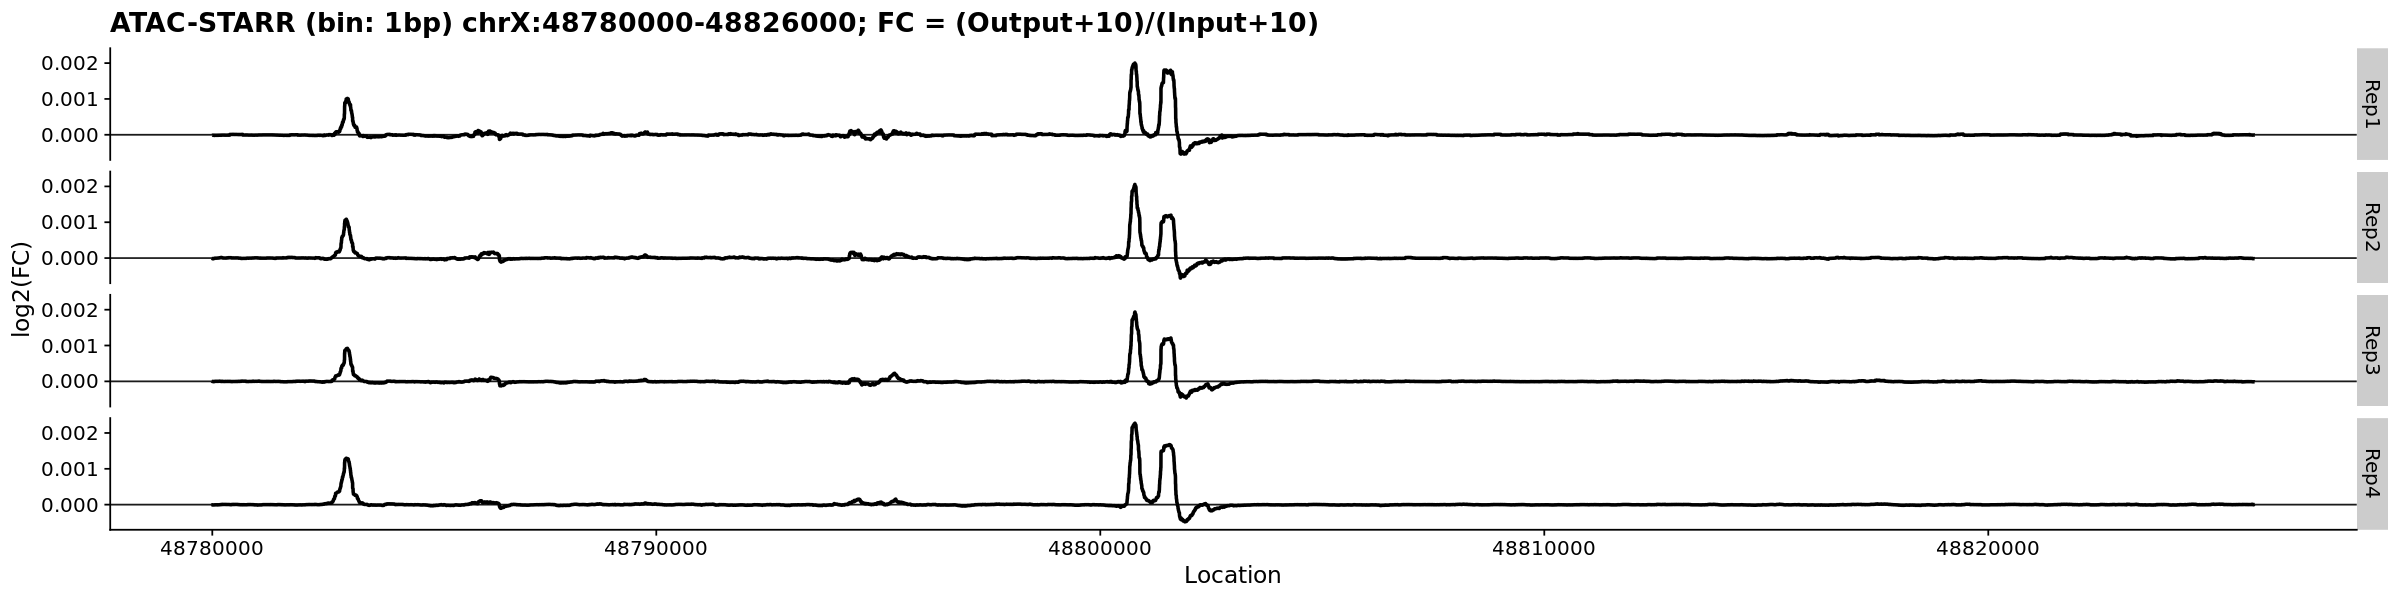

In [48]:
gpt = ggplot(tmp, aes(x = Loc, y = Value)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   facet_grid(Sample~.) +
   labs(x = "Location", 
        y = "log2(FC)", 
        title = "ATAC-STARR (bin: 1bp) chrX:48780000-48826000; FC = (Output+10)/(Input+10)")

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

Warning message:
“Removed 42998 row(s) containing missing values (geom_path).”


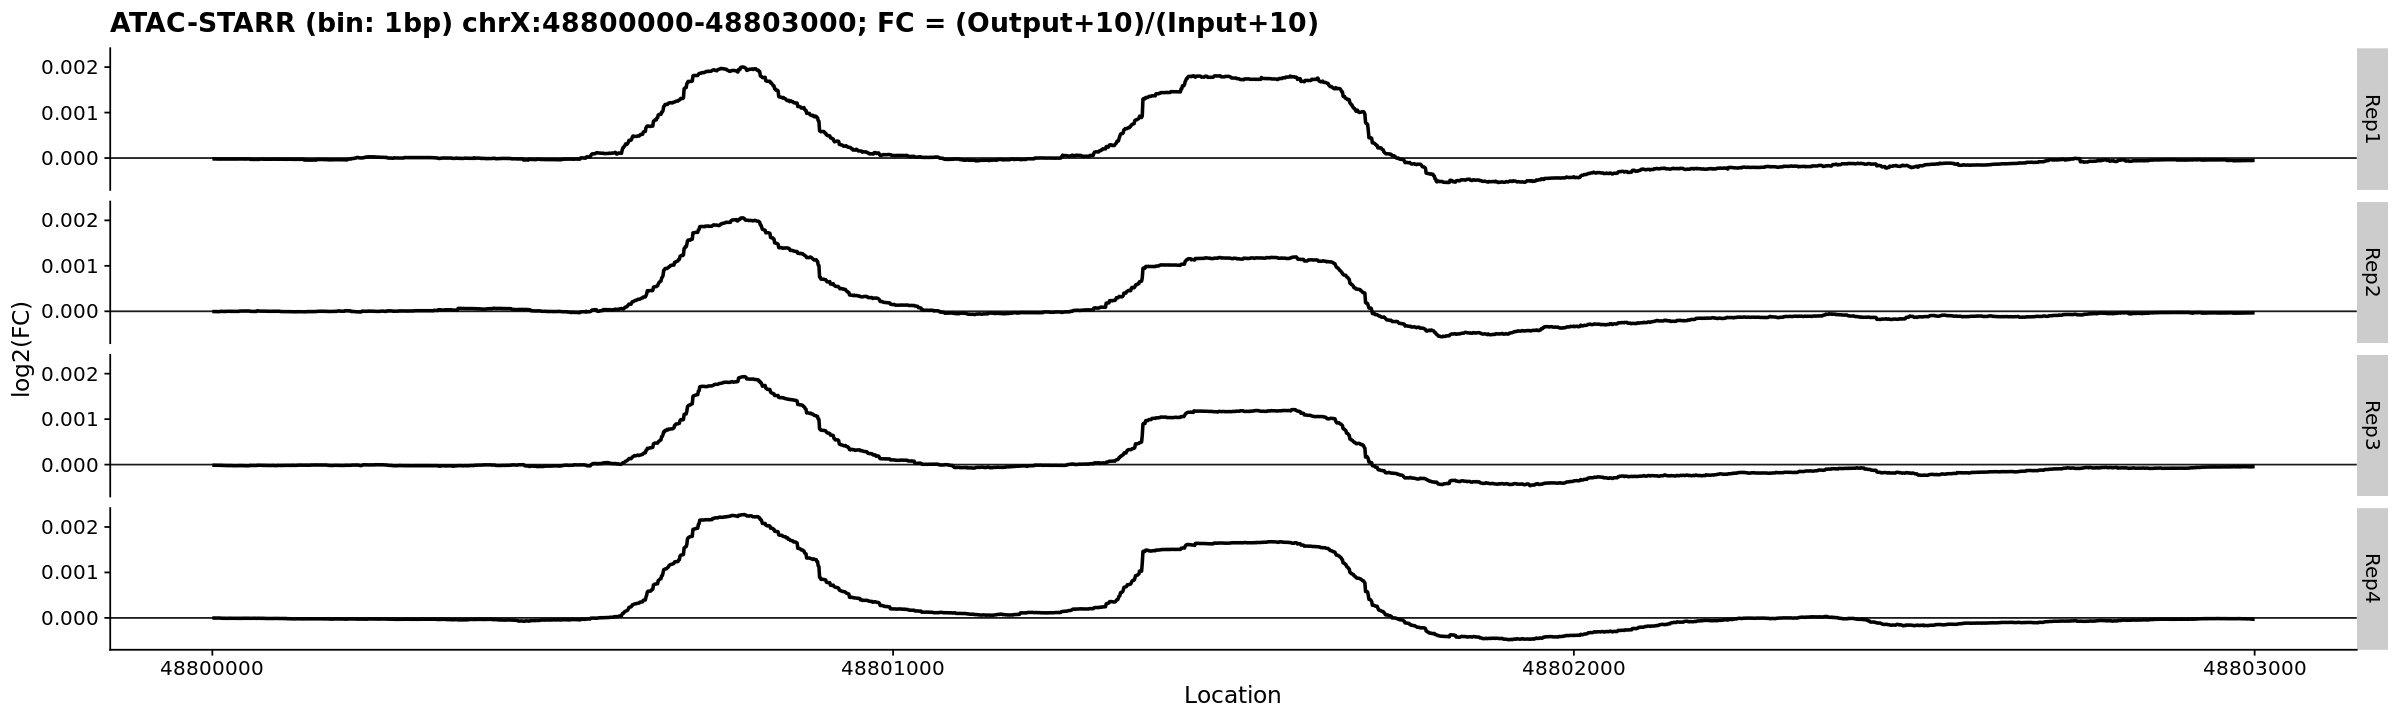

In [49]:
gpt = ggplot(tmp, aes(x = Loc, y = Value)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   facet_grid(Sample~.) +
   xlim(48800000, 48803000) +
   labs(x = "Location", 
        y = "log2(FC)", 
        title = "ATAC-STARR (bin: 1bp) chrX:48800000-48803000; FC = (Output+10)/(Input+10)")


options(repr.plot.height=6, repr.plot.width=20)
print(gpt)

In [4]:
### summarize
dat = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by="Sample") %>%
    mutate(Depth_Norm = Depth / Size)
print(head(dat))

dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(
        FC1 =  Output     / (Input+1),
        FC2 = (Output+1)  / (Input+1),
        FC3 = (Output+10) / (Input+10)) %>%
    mutate(
        Log2fc2 = log2(FC2),
        Log2fc3 = log2(FC3)
    )
        
### assign
dat_astarr = dat
print(dim(dat_astarr))
head(dat_astarr)

# A tibble: 6 × 8
  Chrom      Loc Depth Sample     Group Replicate   Size Depth_Norm
  <chr>    <dbl> <dbl> <chr>      <chr> <chr>      <dbl>      <dbl>
1 chrX  47786400     0 Input_rep1 Input rep1      358823          0
2 chrX  47786401     0 Input_rep1 Input rep1      358823          0
3 chrX  47786402     0 Input_rep1 Input rep1      358823          0
4 chrX  47786403     0 Input_rep1 Input rep1      358823          0
5 chrX  47786404     0 Input_rep1 Input rep1      358823          0
6 chrX  47786405     0 Input_rep1 Input rep1      358823          0
[1] 2000350       8


Loc,Input,Output,FC1,FC2,FC3,Log2fc2,Log2fc3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47786400,0,0,0,1,1,0,0
47786401,0,0,0,1,1,0,0
47786402,0,0,0,1,1,0,0
47786403,0,0,0,1,1,0,0
47786404,0,0,0,1,1,0,0
47786405,0,0,0,1,1,0,0


## Zoom-In: ChrX:48,780,000-48,826,000

In [5]:
start  = 48780000
end    = 48826000

dat = dat_astarr %>% dplyr::filter(start < Loc, Loc < end)
head(dat)

Loc,Input,Output,FC1,FC2,FC3,Log2fc2,Log2fc3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48780001,0.0001797762,0.0001209439,0.0001209222,0.9999412,0.9999941,-8.486431e-05,-8.487580e-06
48780002,0.0001809119,0.0001250035,0.0001249809,0.9999441,0.9999944,-8.064641e-05,-8.065751e-06
48780003,0.0001768448,0.0001116722,0.0001116525,0.9999348,0.9999935,-9.401056e-05,-9.402276e-06
48780004,0.0001768448,0.0001116722,0.0001116525,0.9999348,0.9999935,-9.401056e-05,-9.402276e-06
48780005,0.0001768448,0.0001113339,0.0001113142,0.9999345,0.9999934,-9.449856e-05,-9.451081e-06
48780006,0.0001757031,0.0001106573,0.0001106379,0.9999350,0.9999935,-9.382783e-05,-9.383992e-06


In [8]:
gpt = ggplot(dat, aes(x = Loc, y = Log2fc3)) + 
   geom_point(size=1) + 
   theme_cowplot()

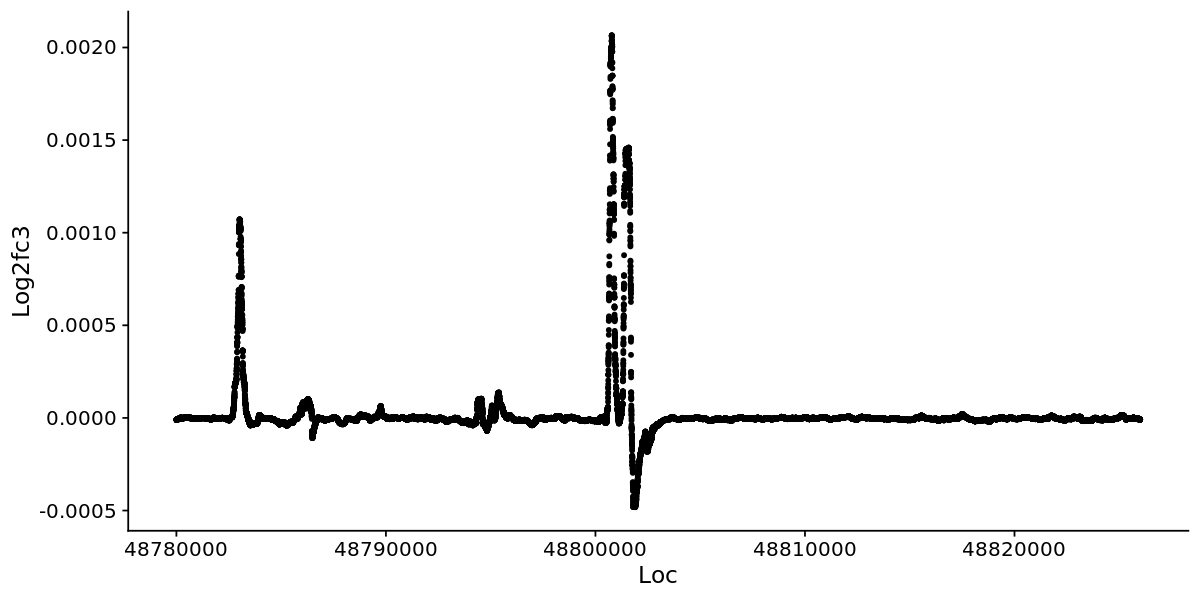

In [9]:
options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

## Import data

**Tiling MPRA**

In [2]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
dir(fdiry)

[1] "Tile_K562_20210130.GATA1.unstranded.bed"

In [3]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_20210130.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

### set columns
cnames = c("chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc_se")

### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign and show
dat_tmpra = dat
head(dat_tmpra)

chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc_se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790,47786500
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705,47786550
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968,47786600
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661,47786650
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741,47786700
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406,47786750


**ATAC-STARR**

In [4]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

### set column
ctypes = c(col_integer(), col_double(), col_double(), col_double())

### read data and show
dat_astarr = read_tsv(fpath, col_types = ctypes)
head(dat_astarr)

Loc,Input,Output,Ratio
<dbl>,<dbl>,<dbl>,<dbl>
47786400,0,0,0
47786401,0,0,0
47786402,0,0,0
47786403,0,0,0
47786404,0,0,0
47786405,0,0,0


In [5]:
print(range(dat_astarr$Loc))
print(range(dat_tmpra$Loc))
print(range(dat_tmpra$Start))
print(range(dat_tmpra$End))

[1] 47786400 49786749
[1] 47786500 49786650
[1] 47786401 49786551
[1] 47786600 49786750


## Zoom-In: ChrX:48,780,000-48,826,000

In [11]:
### set bins
start  = 48780000
end    = 48826000
size   = 100
breaks = seq(start, end, size)

### binning the data
df1 = dat_astarr
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_tmpra 
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% group_by(group) %>% summarize(Val = sum(Ratio))     %>% na.omit
df2 = df2 %>% group_by(group) %>% summarize(Val = sum(2**log2fc)) %>% na.omit

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

### show results
cat("ASTARR", dim(df1), "\n")
print(head(df1, 3))
cat("\n")
cat("Tiling MPRA", dim(df2), "\n")
print(head(df2, 3))

ASTARR 460 3 
# A tibble: 3 × 3
      Left    Right    Val
     <int>    <int>  <dbl>
1 48780000 48780100 0.0423
2 48780100 48780200 0.0426
3 48780200 48780300 0.0276

Tiling MPRA 459 3 
# A tibble: 3 × 3
      Left    Right   Val
     <int>    <int> <dbl>
1 48780000 48780100  2.01
2 48780100 48780200  2.33
3 48780200 48780300  1.68


**Plot**

In [12]:
### create figure
dat = df1
gp1 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Val)) +
    labs(y="Ratio", title="ATAC-STARR-seq") +
    theme_cowplot()

In [13]:
### create figure
dat = df2
gp2 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Val)) +
labs(y="Ratio", title="Tiling MPRA") +
    theme_cowplot()

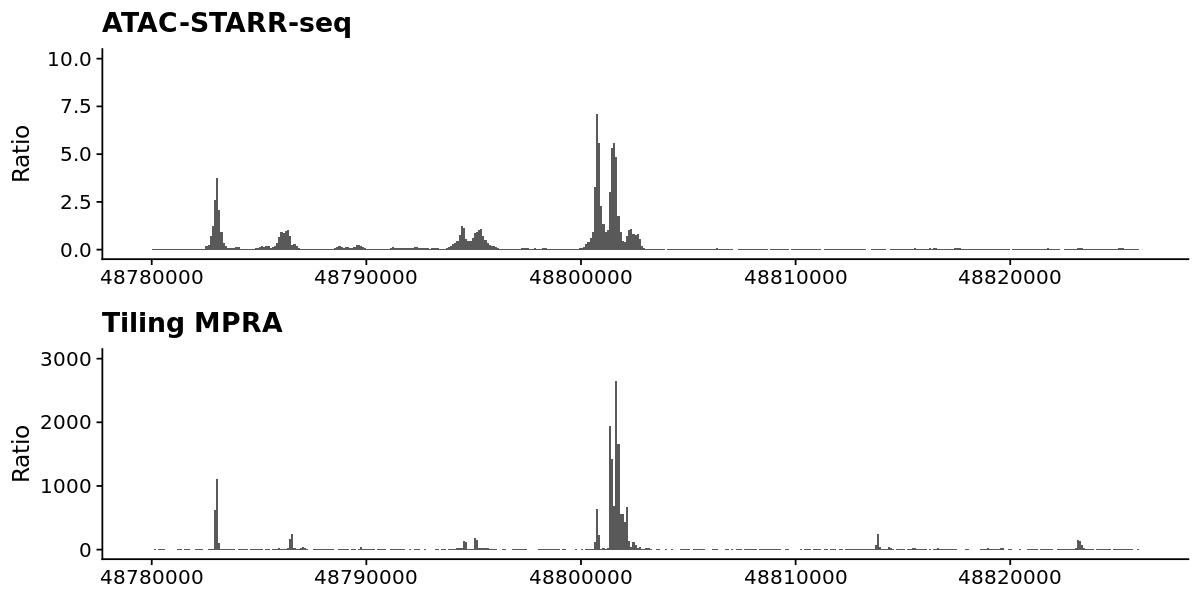

In [15]:
options(repr.plot.height=5, repr.plot.width=10)
plot_grid(
    gp1 + ylim(0, 10), 
    gp2 + ylim(0, 3000), 
    align="v", 
    nrow=2, 
    ncol=1)

**Plot (Log scale)**

In [61]:
### create figure
dat = df1
gp1 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=log2(Val))) +
    theme_cowplot()

In [62]:
### create figure
dat = df2
gp2 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=log2(Val))) +
    theme_cowplot()

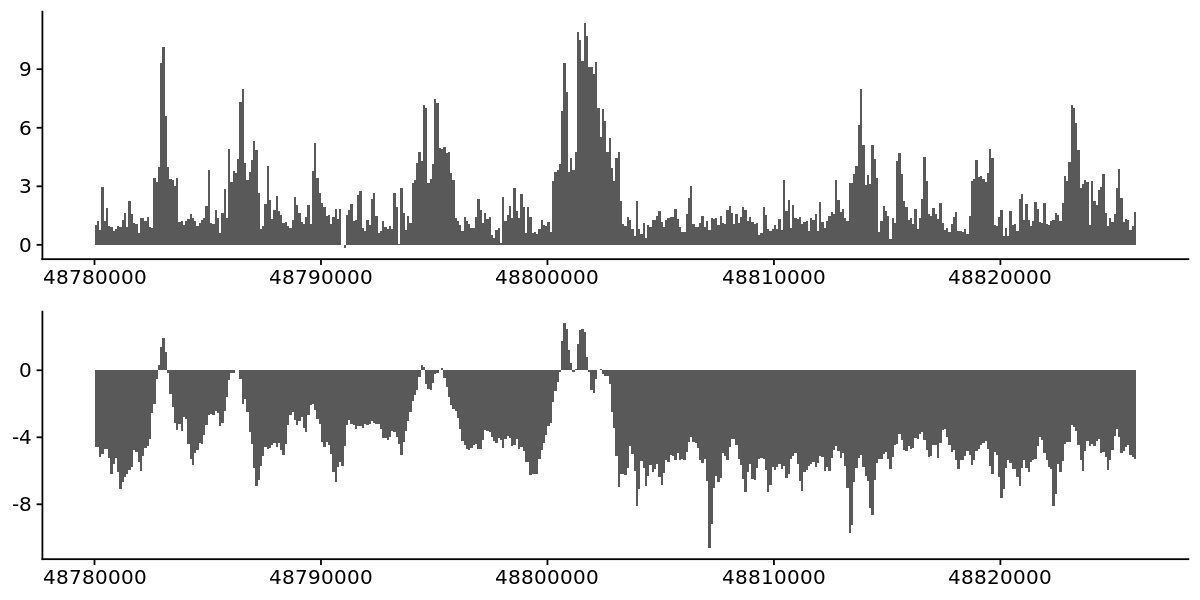

In [63]:
options(repr.plot.height=5, repr.plot.width=10)
plot_grid(
    gp1 , 
    gp2 , 
    align="v", 
    nrow=2, 
    ncol=1)

## Plot whole

In [87]:
### set bins
start  = 47786400
end    = 49786800
size   = 5000
breaks = seq(start, end, size)

### binning the data
df1 = dat_mpra 
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_astarr
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% group_by(group) %>% summarize(Val = sum(2**log2fc)) %>% na.omit
df2 = df2 %>% group_by(group) %>% summarize(Val = sum(Ratio))     %>% na.omit

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

### show results
cat("Tiling MPRA", dim(df1), "\n")
print(head(df1, 3))
cat("\n")
cat("ASTARR", dim(df2), "\n")
print(head(df2, 3))

Tiling MPRA 365 3 
# A tibble: 3 × 3
      Left    Right   Val
     <int>    <int> <dbl>
1 47786400 47791400  212.
2 47791400 47796400  114.
3 47796400 47801400  194.

ASTARR 400 3 
# A tibble: 3 × 3
      Left    Right   Val
     <int>    <int> <dbl>
1 47786400 47791400 0.369
2 47791400 47796400 0.319
3 47796400 47801400 1.43 


In [88]:
### create figure
dat = df1
gp1 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Val)) +
    theme_cowplot()

In [89]:
### create figure
dat = df2
gp2 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Val)) +
    theme_cowplot()

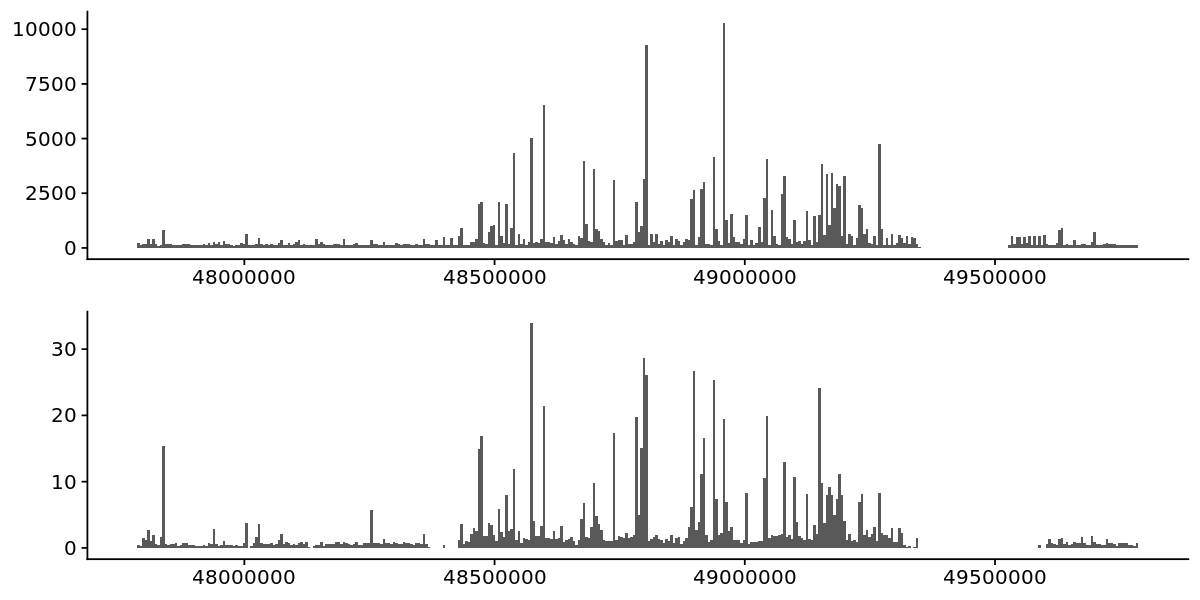

In [90]:
options(repr.plot.height=5, repr.plot.width=10)
plot_grid(
    gp1,#+ ylim(0, 8000), 
    gp2,# + ylim(0, 50), 
    align="v", 
    nrow=2, 
    ncol=1)